In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker

In [2]:
#Assign column names to my data because it doesn't have any

column_names = ['Year', 'Month', 'Day', 'Index1', 'Index2', 'Phase', 'Amplitude']

# Read the MJO.txt file
mjo_data = pd.read_csv("/home/jstancz/data/MJO.txt", sep='\s+', header=None, names=column_names)

# Display the first few rows
print(mjo_data)

      Year  Month  Day   Index1   Index2  Phase  Amplitude
0     2011      1    1  0.31961  0.17840      3   0.366029
1     2011      1    2  0.25930  0.17280      3   0.311603
2     2011      1    3  0.19034  0.18693      3   0.266781
3     2011      1    4  0.11360  0.22080      4   0.248309
4     2011      1    5  0.03045  0.27281      4   0.274504
...    ...    ...  ...      ...      ...    ...        ...
2643  2018      3   28 -1.38235  0.82949      6   1.612124
2644  2018      3   29 -1.41948  0.78580      6   1.622469
2645  2018      3   30 -1.43539  0.70210      6   1.597902
2646  2018      3   31 -1.42788  0.57662      6   1.539913
2647  2018      4    1 -1.39443  0.41067      6   1.453645

[2648 rows x 7 columns]


In [3]:
# Create separate DataFrames for each phase (1 through 8)

phase_1 = mjo_data[mjo_data['Phase'] == 1]
phase_2 = mjo_data[mjo_data['Phase'] == 2]
phase_3 = mjo_data[mjo_data['Phase'] == 3]
phase_4 = mjo_data[mjo_data['Phase'] == 4]
phase_5 = mjo_data[mjo_data['Phase'] == 5]
phase_6 = mjo_data[mjo_data['Phase'] == 6]
phase_7 = mjo_data[mjo_data['Phase'] == 7]
phase_8 = mjo_data[mjo_data['Phase'] == 8]

In [4]:
#Read in precipitation file
file='/home/jstancz/data/UFS_anom_reshaped2.nc'
file2 = '/home/jstancz/Desktop/groups/ORC-CLIMATE/aoes_repo/obs/MSWEP_daily/MSWEP_201*.nc'

ufs_precip = xr.open_mfdataset(file,combine='nested',concat_dim='time')
ufs_precip

/home/jstancz/miniforge/envs/clim_data/lib/python3.10/site-packages/xarray/backends/plugins.py:65: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (/home/jstancz/miniforge/envs/clim_data/lib/python3.10/site-packages/typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset>
Dimensions:       (time: 5880, latitude: 73, longitude: 144)
Coordinates:
  * latitude      (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * longitude     (longitude) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time          (time) datetime64[ns] 2011-04-01 2011-04-02 ... 2018-04-18
    forecast_day  (time) int64 dask.array<chunksize=(5880,), meta=np.ndarray>
Data variables:
    prate_anoms   (time, latitude, longitude) float32 dask.array<chunksize=(5880, 73, 144), meta=np.ndarray>

In [14]:
obs_precip = xr.open_mfdataset(file2,combine='nested',concat_dim='time')

# Extract the time and reindex
time = ufs_precip['time']

# Reindex precip_ds to align with ufs times
obs_precip = obs_precip.reindex(time=time, method='nearest')


obs_precip

<xarray.Dataset>
Dimensions:    (time: 5880, latitude: 73, longitude: 144)
Coordinates:
  * time       (time) datetime64[ns] 2011-04-01 2011-04-02 ... 2018-04-18
  * latitude   (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Data variables:
    precip     (time, latitude, longitude) float32 dask.array<chunksize=(591, 73, 144), meta=np.ndarray>

In [15]:
# Calculate the climatology (mean over the entire time period)
climatology = obs_precip.mean(dim='time')

# Extract the time and reindex
time = ufs_precip['time']

# Calculate the anomalies by subtracting the climatology from the dataset
obs_precip = obs_precip - climatology

In [16]:
obs_precip

<xarray.Dataset>
Dimensions:    (time: 5880, latitude: 73, longitude: 144)
Coordinates:
  * time       (time) datetime64[ns] 2011-04-01 2011-04-02 ... 2018-04-18
  * latitude   (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
Data variables:
    precip     (time, latitude, longitude) float32 dask.array<chunksize=(591, 73, 144), meta=np.ndarray>

In [17]:
ufs_precip

<xarray.Dataset>
Dimensions:       (time: 5880, latitude: 73, longitude: 144)
Coordinates:
  * latitude      (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * longitude     (longitude) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time          (time) datetime64[ns] 2011-04-01 2011-04-02 ... 2018-04-18
    forecast_day  (time) int64 dask.array<chunksize=(5880,), meta=np.ndarray>
Data variables:
    prate_anoms   (time, latitude, longitude) float32 dask.array<chunksize=(5880, 73, 144), meta=np.ndarray>

In [18]:
# Convert the time to pd datetime
mjo_data['Date'] = pd.to_datetime(mjo_data[['Year', 'Month', 'Day']])

# Convert time values in ds_precip_anom to pd datetime
obs_precip['time'] = pd.to_datetime(obs_precip['time'].values)



# Create dictionary to store composites for each phase
phase_composites_obs = {}
phase_anomalies_obs = {}

#UFS anoms and composites

phase_composites_ufs = {}
phase_anomalies_ufs = {}




# Loop through each phase and extract precip anomaly data for obs
for phase in range(1, 9):
    
    # Filter for dates in the current phase
    phase_dates = mjo_data.loc[mjo_data['Phase'] == phase, 'Date']
    
    # precipitation anomalies for these dates
    anomalies = obs_precip.sel(time=obs_precip['time'].isin(phase_dates))
    
    # Calculate the composite precipitation anomaly
    phase_composites_obs[f'phase_{phase}'] = anomalies.mean(dim='time')
    
    #Store the anomalies for each phase into the phase_anomalies dictionary
    phase_anomalies_obs[f'phase_{phase}'] = anomalies
    
    
    
# Loop through each phase and extract precip anomaly data for these dates
for phase in range(1, 9):
    
    # Filter for dates in the current phase
    phase_dates = mjo_data.loc[mjo_data['Phase'] == phase, 'Date']
    
    # precipitation anomalies for these dates
    anomalies = ufs_precip.sel(time=ufs_precip['time'].isin(phase_dates))
    
    # Calculate the composite precipitation anomaly
    phase_composites_ufs[f'phase_{phase}'] = anomalies.mean(dim='time')
    
    #Store the anomalies for each phase into the phase_anomalies dictionary
    phase_anomalies_ufs[f'phase_{phase}'] = anomalies

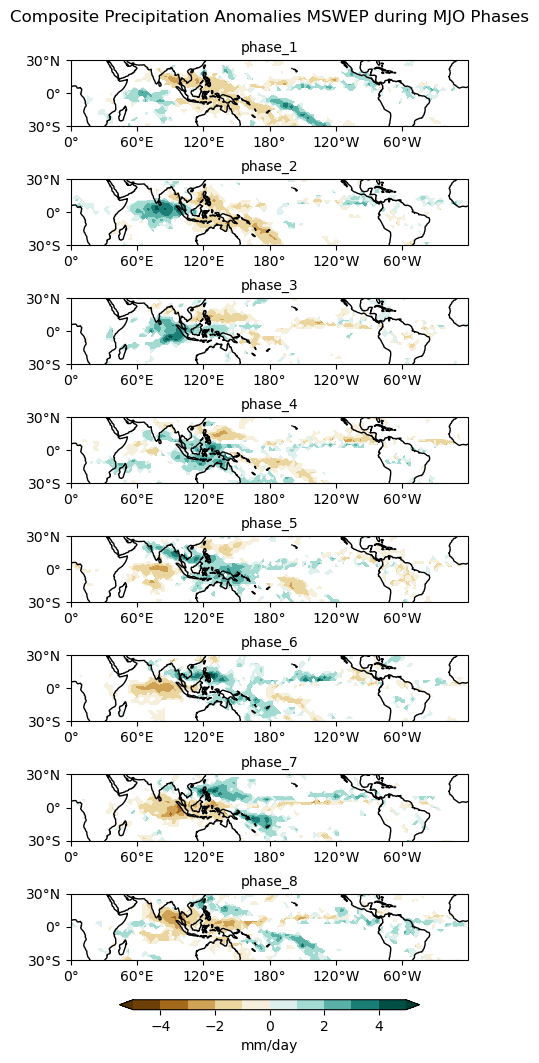

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.colors as mcolors
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

# Define contour levels and colormap
clevs = np.arange(-5.0, 6, 1)  # Define contour levels for precipitation anomalies
cmap = plt.get_cmap('BrBG')  # Use the BrBG colormap

# Define the figure and axes for the subplots (one for each MJO phase)
fig, axs = plt.subplots(nrows=8, ncols=1,
                        figsize=(6, 10),  # Increased figure height for larger plots
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

axs = axs.flatten()

# Loop through the phases and plot each composite
for i, (phase, phase_data) in enumerate(phase_composites_obs.items()):
    
    # Get the data
    data = phase_data['precip'].values  # Precipitation anomaly data (numpy array)
    
    # Mask values between -0.5 and 0.5 (no color for these values)
    data = np.ma.masked_where((data >= -0.5) & (data <= 0.5), data)
    
    # Get longitudes and latitudes
    lons = phase_data.longitude.values  
    lats = phase_data.latitude.values  

    # Zoom in on MJO region
    axs[i].set_extent([0, 360, -30, 30], crs=ccrs.PlateCarree())
    
    # Create the contour plot with the colormap and the masked data
    cs = axs[i].contourf(lons, lats, data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap=cmap, extend='both')

    # Longitude labels
    axs[i].set_xticks(np.arange(0, 360, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-30, 31, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Draw the coastlines for each subplot
    axs[i].coastlines()

    # Add the title for each subplot
    axs[i].set_title(f'{phase}', fontsize=10)

# Adjust the subplot layout to make room for the colorbar
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.8)  # Adjusted spacing

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0, 0.5, 0.01])  # Adjusted color bar height

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies MSWEP during MJO Phases', fontsize=12, y =1)

# Display the plot
plt.show()


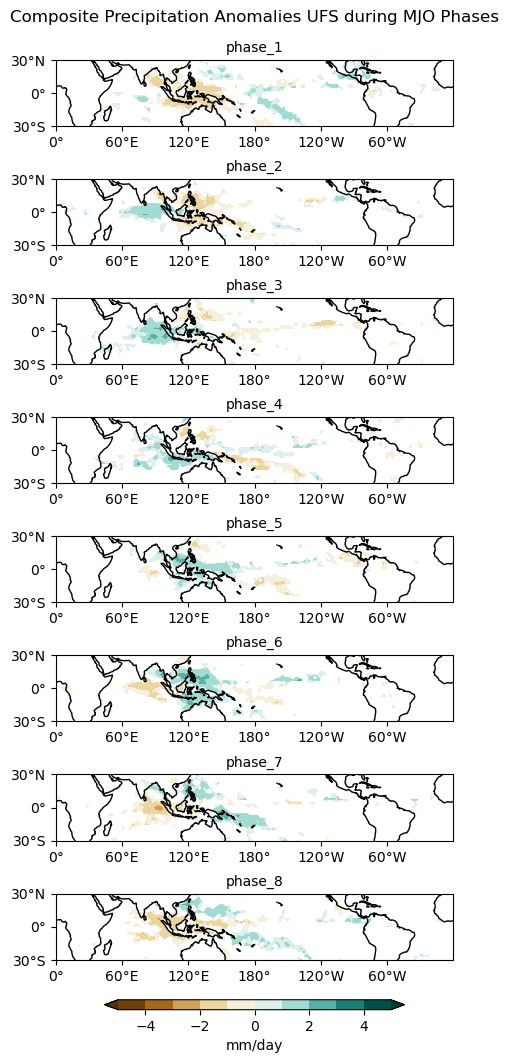

In [43]:
clevs = np.arange(-5.0, 6, 1)  # Define contour levels for precipitation anomalies

# Define the figure and axes for the subplots (one for each MJO phase)
fig, axs = plt.subplots(nrows=8, ncols=1,
                        figsize=(6, 10),  # Increased figure height for larger plots
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

axs = axs.flatten()

# Loop through the phases and plot each composite
for i, (phase, phase_data) in enumerate(phase_composites_ufs.items()):
    
    # Get the data
    data = phase_data['prate_anoms'].values  # Precipitation anomaly data (numpy array)
    
    data = np.ma.masked_where((data >= -0.5) & (data <= 0.5), data)

    
    # Get longitudes and latitudes
    lons = phase_data.longitude.values  
    lats = phase_data.latitude.values  

    # Zoom in on MJO region
    axs[i].set_extent([0, 360, -30, 30], crs=ccrs.PlateCarree())
    
    # Create the contour plot
    cs = axs[i].contourf(lons, lats, data, clevs,
                         transform=ccrs.PlateCarree(),
                         cmap='BrBG', extend='both')

    # Longitude labels
    axs[i].set_xticks(np.arange(0, 360, 60), crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    axs[i].xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    axs[i].set_yticks(np.arange(-30, 31, 30), crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    axs[i].yaxis.set_major_formatter(lat_formatter)

    # Title each subplot with number
    axs[i].set_title(f'{phase}', fontsize=10)

    # Draw the coastlines for each subplot
    axs[i].coastlines()

# Adjust the subplot layout to make room for the colorbar
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.8)  # Adjusted spacing

# Add a colorbar axis at the bottom of the graph (smaller)
cbar_ax = fig.add_axes([0.25, 0, 0.5, 0.01])  # Adjusted color bar height

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies UFS during MJO Phases', fontsize=12, y=1)

# Display the plot
plt.show()

In [44]:
#Dictionary to store differenced composites
diff_composites = {}

# Ensure the Date column in mjo_data is in datetime format
mjo_data['Date'] = pd.to_datetime(mjo_data['Date'])

# Loop through MJO phases (1 to 8)
for phase in range(1, 9):
    # Filter time indices for the current phase
    phase_dates = mjo_data[mjo_data['Phase'] == phase]['Date']
    
    # Extract corresponding precipitation anomalies for obs and ufs
    obs_phase = obs_precip.sel(time=obs_precip['time'].isin(phase_dates))['precip']
    ufs_phase = ufs_precip.sel(time=ufs_precip['time'].isin(phase_dates))['prate_anoms']
    
    
    obs_composite = obs_phase.mean(dim='time')
    ufs_composite = ufs_phase.mean(dim='time')
        
    # Calculate the difference (obs - ufs)
    diff_composites[phase] = ufs_composite - obs_composite
   

In [45]:
diff_composites[1]

<xarray.DataArray (latitude: 73, longitude: 144)>
dask.array<sub, shape=(73, 144), dtype=float32, chunksize=(73, 144), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -90.0 -87.5 -85.0 -82.5 ... 85.0 87.5 90.0
  * longitude  (longitude) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5

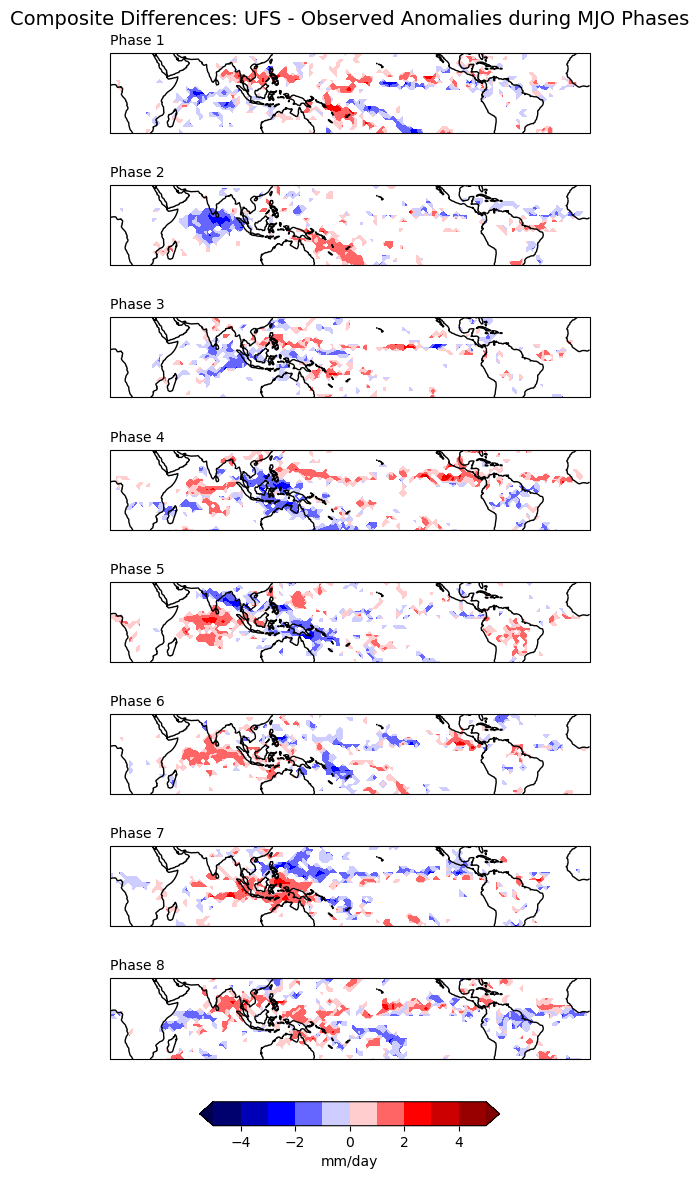

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Define contour levels for precipitation anomalies
clevs = np.arange(-5.0, 6, 1)

# Define the figure and axes for the subplots (one for each MJO phase)
fig, axs = plt.subplots(
    nrows=8, ncols=1,
    figsize=(6, 12),  # Adjusted for better subplot spacing
    subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}
)

axs = axs.flatten()  # Flatten the axes array for easier indexing

# Loop through the phases and plot each composite
for i, (phase, phase_data) in enumerate(diff_composites.items()):
    # Extract the data array, longitudes, and latitudes
    data = phase_data.values# Numpy array of precipitation differences
    data = np.ma.masked_where((data >= -0.5) & (data <= 0.5), data)

    lons = phase_data.longitude.values
    lats = phase_data.latitude.values

    # Zoom in on the MJO region (tropics)
    axs[i].set_extent([0, 360, -30, 30], crs=ccrs.PlateCarree())

    # Create the filled contour plot
    cs = axs[i].contourf(
        lons, lats, data, clevs,
        transform=ccrs.PlateCarree(),
        cmap='seismic', extend='both'
    )

    # Add coastlines for geographical context
    axs[i].coastlines()

    # Title each subplot with the corresponding MJO phase
    axs[i].set_title(f'Phase {phase}', fontsize=10, loc='left')

# Adjust the subplot layout to make room for the colorbar
fig.subplots_adjust(
    bottom=0.1, top=0.95, left=0.1, right=0.9,
    wspace=0.2, hspace=0.4
)

# Add a colorbar axis at the bottom
cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.02])  # Adjusted position and size
cbar = fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', label='mm/day')

# Add an overall title
plt.suptitle(
    'Composite Differences: UFS - Observed Anomalies during MJO Phases',
    fontsize=14, y=0.98
)

# Display the plot
plt.show()
